In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score

In [4]:
df = pd.read_csv("Social_Network_ADS.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
def gender_num(x):
  if x == "Male":
    return 1
  else:
    return 0

In [6]:
df["Gender"] = df["Gender"].apply(gender_num)

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
scalar = StandardScaler()
x = scalar.fit_transform(df[["Gender", "Age", "EstimatedSalary"]])
y = df["Purchased"]

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [10]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [11]:
ypred = model.predict(xtest)

In [12]:
matrix = confusion_matrix(ytest, ypred)
matrix

array([[50,  4],
       [ 7, 19]])

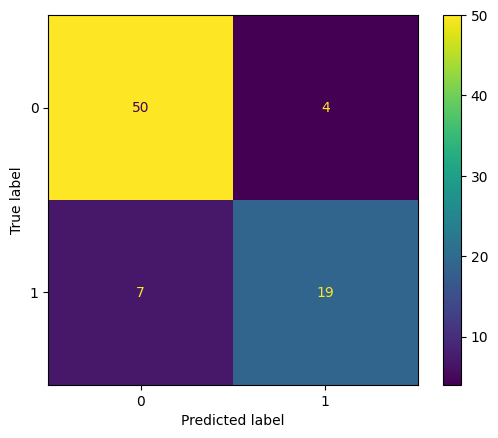

In [13]:
disp_matrix = ConfusionMatrixDisplay(matrix, display_labels=model.classes_)
disp_matrix.plot()
plt.show()

In [14]:
tn, fp, fn, tp = matrix.ravel()
tn, fp, fn, tp

(50, 4, 7, 19)

In [15]:
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.83      0.73      0.78        26

    accuracy                           0.86        80
   macro avg       0.85      0.83      0.84        80
weighted avg       0.86      0.86      0.86        80



In [16]:
score = accuracy_score(ytest, ypred)
print(score)

0.8625


In [17]:
error = 1 - score
print(error)

0.13749999999999996


In [18]:
precision = precision_score(ytest, ypred)
print(precision)

0.8260869565217391


In [19]:
recall = recall_score(ytest, ypred)
print(recall)

0.7307692307692307
